**Assignment 4**

**1. Download the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.Loading data set**

In [2]:
df = pd.read_csv("Mall_Customers.csv")


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3. Perform visualization**

Univariate analysis


(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

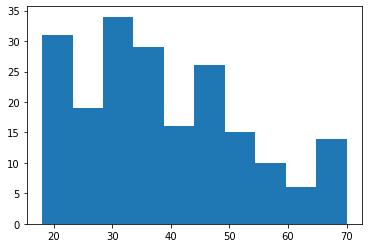

In [4]:
plt.hist(df['Age'])


Bivariate analysis


<AxesSubplot:xlabel='Gender', ylabel='Age'>

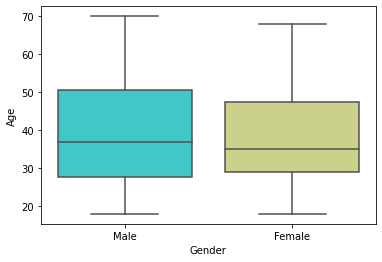

In [5]:
sns.boxplot(x='Gender',y='Age',data=df,palette='rainbow')

Multivariate analysis

<AxesSubplot:>

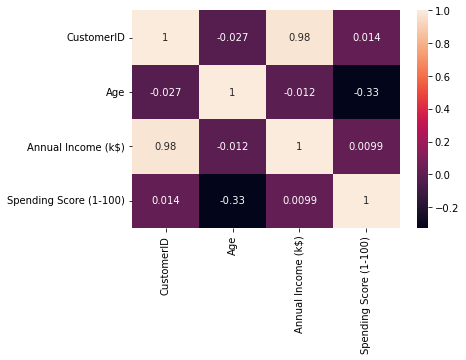

In [6]:
sns.heatmap(df.corr(),annot=True)

**4. Perform descriptive statistics on the dataset.**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**5. Check for Missing values and deal with them.**

In [8]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**6. Find the outliers and replace them outliers**

In [10]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [11]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


<AxesSubplot:xlabel='Spending Score (1-100)'>

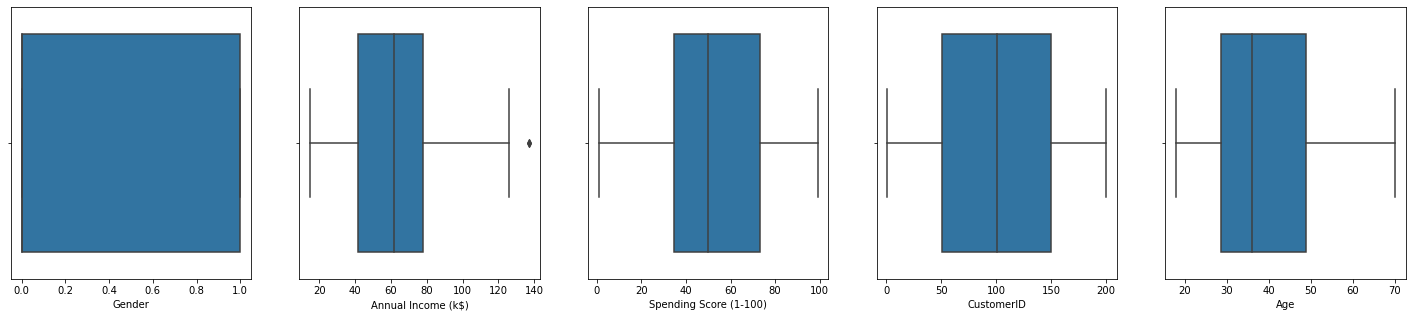

In [12]:
fig,ax=plt.subplots(figsize=(25,5))



plt.subplot(1, 5, 4)
sns.boxplot(x=df['CustomerID'])

plt.subplot(1, 5, 1)
sns.boxplot(x=df['Gender'])

plt.subplot(1, 5, 5)
sns.boxplot(x=df['Age'])

plt.subplot(1, 5, 2)
sns.boxplot(x=df['Annual Income (k$)'])

plt.subplot(1, 5, 3)
sns.boxplot(x=df['Spending Score (1-100)'])

In [13]:
#handle the outlier
q=df.quantile(q=[0.25,0.75])

q


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,0.0,28.75,41.5,34.75
0.75,150.25,1.0,49.00,78.0,73.00


In [14]:
iqr=q.loc[0.75]-q.loc[0.25] 
iqr

CustomerID                99.50
Gender                     1.00
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [15]:
l=q.loc[0.25]-(1.5*iqr)
l

CustomerID               -98.500
Gender                    -1.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [16]:
u=q.loc[0.75]+(1.5*iqr)
u

CustomerID                299.500
Gender                      2.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [17]:
df.mean()

CustomerID                100.50
Gender                      0.44
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

<AxesSubplot:xlabel='Annual Income (k$)'>

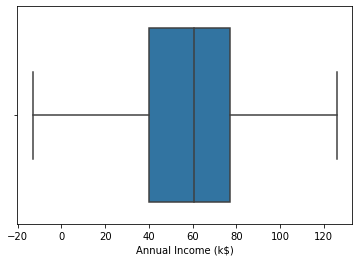

In [18]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>132.750,-13.250,df['Annual Income (k$)'])
#df['Annual Income (k$)']=np.where(df['Annual Income (k$)']<3.5,9.933684,df['Annual Income (k$)'])
sns.boxplot(x=df['Annual Income (k$)'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    int64  
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


**7. Check for Categorical columns and perform encoding.**

In [20]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [21]:
df.head()
#gender is the categorical column and encoding is performed

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


**8. Scaling the data**

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
sc=MinMaxScaler()

In [24]:
data=sc.fit_transform(df.iloc[:,1:])

In [25]:
data

array([[1.        , 0.01923077, 0.20287253, 0.3877551 ],
       [1.        , 0.05769231, 0.20287253, 0.81632653],
       [0.        , 0.03846154, 0.21005386, 0.05102041],
       [0.        , 0.09615385, 0.21005386, 0.7755102 ],
       [0.        , 0.25      , 0.21723519, 0.39795918],
       [0.        , 0.07692308, 0.21723519, 0.76530612],
       [0.        , 0.32692308, 0.22441652, 0.05102041],
       [0.        , 0.09615385, 0.22441652, 0.94897959],
       [1.        , 0.88461538, 0.23159785, 0.02040816],
       [0.        , 0.23076923, 0.23159785, 0.7244898 ],
       [1.        , 0.94230769, 0.23159785, 0.13265306],
       [0.        , 0.32692308, 0.23159785, 1.        ],
       [0.        , 0.76923077, 0.23877917, 0.14285714],
       [0.        , 0.11538462, 0.23877917, 0.7755102 ],
       [1.        , 0.36538462, 0.23877917, 0.12244898],
       [1.        , 0.07692308, 0.23877917, 0.79591837],
       [0.        , 0.32692308, 0.2459605 , 0.34693878],
       [1.        , 0.03846154,

**9. Perform any of the clustering algorithms**

In [26]:
from sklearn.cluster import KMeans

In [27]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)

In [28]:
TWSS

[397879.99471197114,
 286281.3143374741,
 209432.15675970103,
 171294.2250685679,
 137377.2499319015,
 117470.70456688973,
 99854.71631016041]

Text(0, 0.5, 'TWSS')

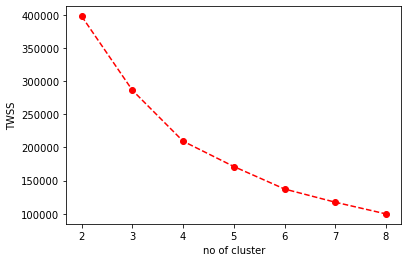

In [29]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [30]:
model=KMeans(n_clusters=4)

model.fit(df)

KMeans(n_clusters=4)

In [31]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [32]:
mb=pd.Series(model.labels_)

In [33]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6


**10. Add the cluster data with the primary dataset**

In [34]:
df['clust']=mb

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15.0,39,1
1,2,1,21,15.0,81,1
2,3,0,20,16.0,6,1
3,4,0,23,16.0,77,1
4,5,0,31,17.0,40,1


In [36]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,0,35,120.00,79,0
196,197,0,45,126.00,28,3
197,198,1,32,126.00,74,0
198,199,1,32,-13.25,18,3
199,200,1,30,-13.25,83,0


**11. Split the data into dependent and independent
variables.**

In [37]:
x=df.drop(columns=['CustomerID','clust'],axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [38]:
y=df['clust']
y

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    3
197    0
198    3
199    0
Name: clust, Length: 200, dtype: int32

**12. Split the data into training and testing**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**12. Split the data into training and testing**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf=RandomForestClassifier()

**14. Train the Model**

In [43]:
rf.fit(x_train,y_train)

RandomForestClassifier()

**15. Test the Model**

In [44]:
pred=rf.predict(x_test)

**16. Measure the performance using Evaluation Metrics.**

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.975

In [46]:
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[10,  0,  0,  0],
       [ 0, 13,  0,  0],
       [ 0,  1,  8,  0],
       [ 0,  0,  0,  8]], dtype=int64)